In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [88]:
data = pd.read_csv('https://apmonitor.com/che263/uploads/Main/heart_rate.txt')
data

,Time (sec),Heart Rate (BPM)
0,0.0,103
1,5.0,103
2,10.0,103
3,15.0,105
4,20.0,108
...,...,...
236,1180.0,153
237,1185.0,154
238,1190.0,154
239,1195.0,154


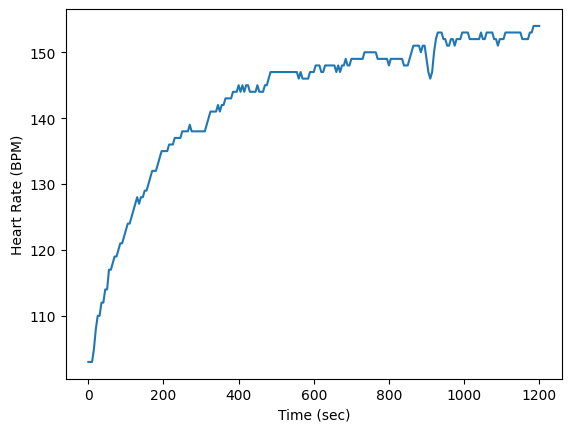

In [89]:
plt.plot(data['Time (sec)'], data['Heart Rate (BPM)'])
plt.xlabel("Time (sec)")
plt.ylabel("Heart Rate (BPM)")
plt.show()

In [90]:
def bpm(t,c0,c1,c2,c3):
    return c0+c1*t-c2*np.exp(-c3*t)

In [91]:
g = [150,0.01,80,0.01]#guess values for the 4 parameters in the funnction

In [92]:
x = data['Time (sec)']
y = data['Heart Rate (BPM)']
n = len(data['Time (sec)'])
yp = np.empty(n)
for i in range(n):
    yp[i] = bpm(x[i],g[0],g[1],g[2],g[3])

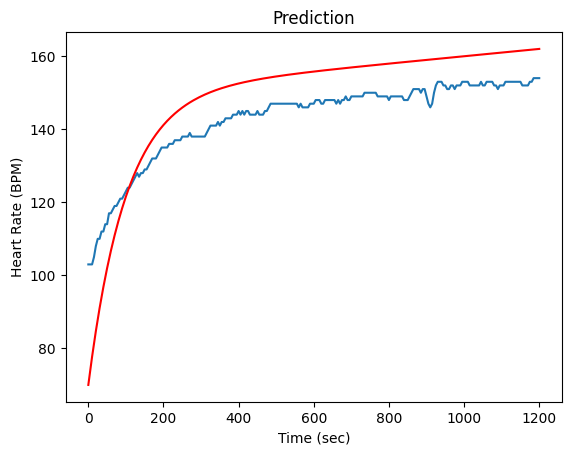

In [93]:
plt.plot(data['Time (sec)'], data['Heart Rate (BPM)'])
plt.plot(data['Time (sec)'], yp, 'r-')
plt.xlabel("Time (sec)")
plt.ylabel("Heart Rate (BPM)")
plt.title('Prediction')
plt.show()

In [94]:
c, cov = curve_fit(bpm,x,y,g)
print(c)#parameter values

[1.42373197e+02 9.24806099e-03 4.00292043e+01 6.84029118e-03]


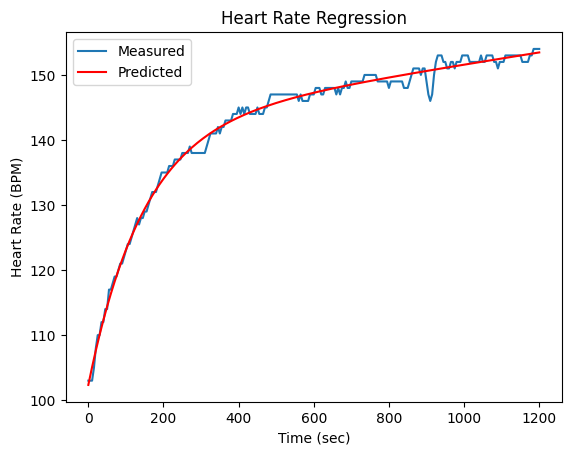

In [101]:
for i in range(n):
    yp[i] = bpm(x[i],c[0],c[1],c[2],c[3])

plt.plot(x, y)
plt.plot(x, yp, 'r-')
plt.legend(['Measured', 'Predicted'])
plt.xlabel("Time (sec)")
plt.ylabel("Heart Rate (BPM)")
plt.title('Heart Rate Regression')
plt.show()